In [58]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import seaborn
import seaborn as sns

# Dependencies and Setup
import json
import pandas as pd
import hvplot.pandas
import time
import numpy as np


import matplotlib.pyplot as plt

In [59]:
# Read in dataset
titles_df = pd.read_csv("titles_updated.csv")
titles_df

Title     type  \
0                                                    3%  TV Show   
1                                                  7:19    Movie   
2                                                 23:59    Movie   
3                                                     9    Movie   
4                                                    21    Movie   
5                                                    46  TV Show   
6                                                   706    Movie   
7                                                  1920    Movie   
8                                                  1922    Movie   
9                                                  1983  TV Show   
10                                                 1994  TV Show   
11                                                2,215    Movie   
12                                                 3022    Movie   
13                                               22-Jul    Movie   
14                                               15-Aug    Movie   
15                                             (T)ERROR    Movie   
16                                             #blackAF  TV Show   
17                                     #cats_the_mewvie    Movie   
18                                         #realityhigh    Movie   
19                                            #Rucker50    Movie   
20                                              #Selfie    Movie   
21                                       ¡Ay, mi madre!    Movie   
22                          Çok Filim Hareketler Bunlar    Movie   
23                                       10 jours en or    Movie   
24                                           100 Meters    Movie   
25                                          100% Hotter  TV Show   
26                                      1000 Rupee Note    Movie   
27                                           13 Cameras    Movie   
28                                       13 Reasons Why  TV Show   
29                   13 Reasons Why: Beyond the Reasons  TV Show   
30                                              13 Sins    Movie   
31                                            14 Blades    Movie   
32                                           14 Cameras    Movie   
33                                14 Minutes from Earth    Movie   
34                                          18 Presents    Movie   
35                1898: Our Last Men in the Philippines    Movie   
36                                             2 States    Movie   
37                                           20 Minutes  TV Show   
38                                   2015 Dream Concert    Movie   
39                                   20th Century Women    Movie   
40                                           21 Thunder  TV Show   
41                                     24 Hours to Live    Movie   
42                                             25 Kille    Movie   
43                                             26 Years    Movie   
44                                        3 Generations    Movie   
45                                           3 Heroines    Movie   
46                                             3 Idiots    Movie   
47                                    3 Seconds Divorce    Movie   
48                                  300 Miles to Heaven    Movie   
49                                           37 Seconds    Movie   
50                             3Below: Tales of Arcadia  TV Show   
51                                              44 Cats  TV Show   
52                                  48 Christmas Wishes    Movie   
53                                         5 Flights Up    Movie   
54                                     5 Star Christmas    Movie   
55                                           6 Balloons    Movie   
56                                               6 Days    Movie   
57                                        6 Underground    Movie   
58                                    

In [60]:
# Show datatypes
titles_df.dtypes

Title            object
type             object
country          object
date_added       object
release_year      int64
rating           object
description      object
IMDb            float64
Genre            object
dtype: object

In [61]:
# Show complete dataframe
#pd.set_option("display.max_rows", 9999)

In [62]:
# Show shape of dataframe
titles_df.shape

(3891, 9)

In [63]:
# Show unique values
titles_df["country"].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'India', 'Poland', 'Thailand', 'Norway', 'Canada', 'Romania',
       'Spain', 'France', 'Portugal', 'United Kingdom', 'Hong Kong',
       'Italy', 'South Korea', 'South Africa', 'Indonesia', 'Denmark',
       'Japan', 'New Zealand', 'Australia', 'Nigeria', 'China',
       'Netherlands', 'Germany', 'Argentina', 'Philippines',
       'United Arab Emirates', 'Taiwan', 'Israel', 'Pakistan', 'Bulgaria',
       'Mauritius', 'Colombia', 'Uruguay', 'Soviet Union', 'Sweden',
       'Egypt', 'Iceland', 'Ireland', 'Chile', 'Ghana', 'Saudi Arabia',
       'Belgium', 'Russia', 'Finland', 'Malaysia', 'Hungary', 'Venezuela',
       'Czech Republic', 'Cambodia', 'Austria', 'Vietnam', 'Kenya',
       'Slovenia', 'Peru', 'Kuwait', 'Serbia', 'Bangladesh', 'Georgia',
       'Switzerland', 'Puerto Rico', 'Lebanon', 'Ukraine', 'Jamaica',
       'Cyprus', 'Greece', 'Croatia'], dtype=object)

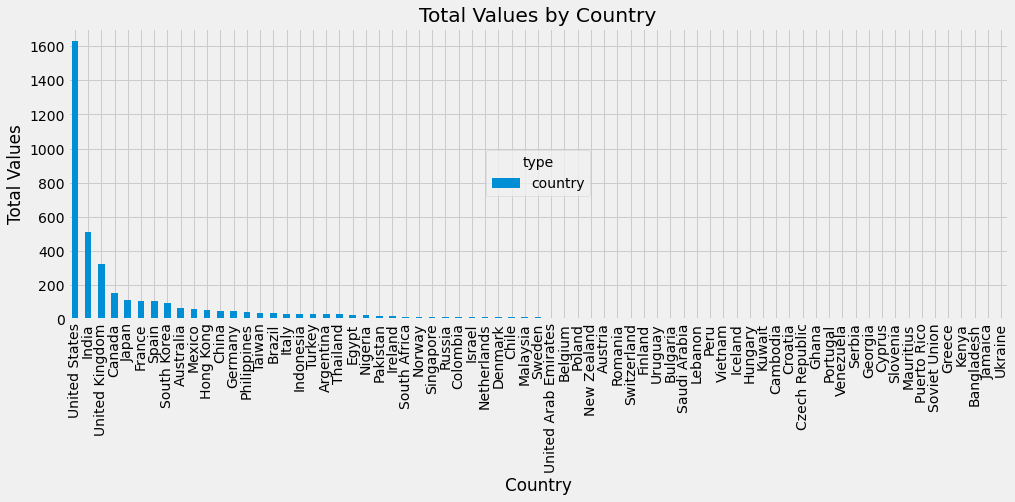

In [64]:
# Create bar graph for countries
from matplotlib import style
style.use('fivethirtyeight')
titles_df.country.value_counts().plot.bar(figsize=(15,5), title="Total Values by Country", x="Country", y="Value")
plt.legend(loc="center", title='type')
plt.ylabel("Total Values")
plt.xlabel("Country")

# Save Figure
plt.savefig("visualizations/values_by_country.png")
plt.show()

In [65]:
# Summary Statistics on IMDb ratings
titles_df['IMDb'].describe() 


count    3891.000000
mean        6.541712
std         1.198545
min         1.400000
25%         5.800000
50%         6.600000
75%         7.400000
max         9.500000
Name: IMDb, dtype: float64

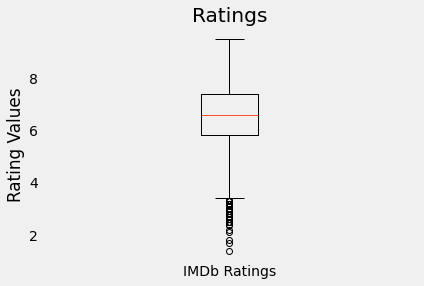

Summary Statistics


count    3891.000000
mean        6.541712
std         1.198545
min         1.400000
25%         5.800000
50%         6.600000
75%         7.400000
max         9.500000
Name: IMDb, dtype: float64

In [66]:
# Create a box-and-whisker plot. NOT SURE ABOUT THIS BOXPLOT
x_labels = ["IMDb Ratings"]
fig, ax = plt.subplots()
ax.boxplot(titles_df['IMDb'], labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ratings')
ax.set_ylabel('Rating Values')
#ax.set_yticks(step=2)
ax.grid()
# Save Figure
plt.savefig("visualizations/boxplot2.png")
plt.show()
print("Summary Statistics")
titles_df['IMDb'].describe() 

In [67]:
# Create the Movies and TV Shows DataFrames.
movies_df = titles_df[titles_df["type"] == "Movie"]
tv_shows_df = titles_df[titles_df["type"] == "TV Show"]

In [68]:
# Filter Movies dataframe
movies_imdb = movies_df.groupby(["Genre"]).mean()["IMDb"]
movies_imdb

Genre
Action & Adventure    5.918713
Anime                 7.450000
Children              6.043421
Comedy                6.122006
Documentaries         6.906452
Drama                 6.389282
Horror                5.344242
Musicals              7.375000
Romance               5.921429
Sci-Fi & Fantasy      5.735000
Thrillers             5.805882
Name: IMDb, dtype: float64

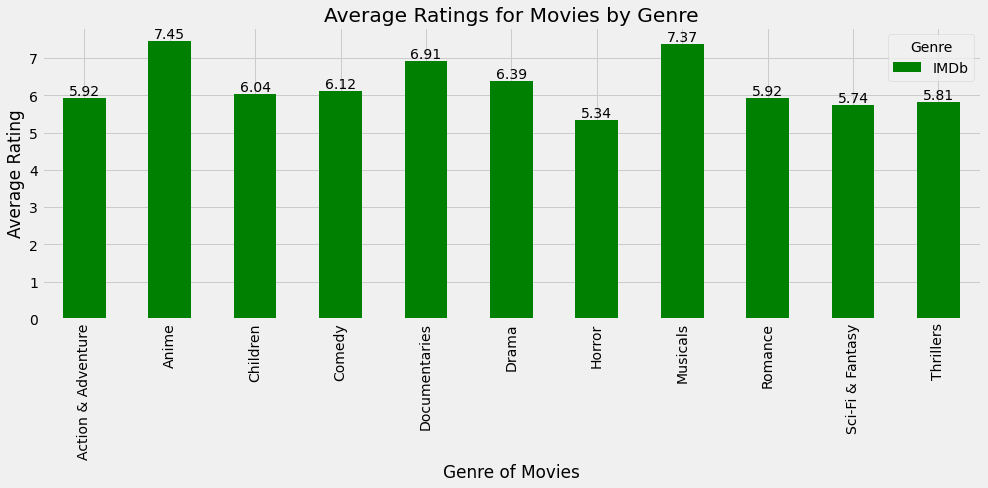

In [69]:
# Create bar graph for Movie ratings by genre
from matplotlib import style
style.use('fivethirtyeight')
movies_imdb.plot.bar(figsize=(15,5), title="Average Ratings for Movies by Genre", color = 'g')
plt.legend(loc="best", title='Genre')
plt.ylabel("Average Rating")
plt.xlabel("Genre of Movies")
for i in range(len(movies_imdb)):
    plt.text(i, round(movies_imdb[i], 2), round(movies_imdb[i], 2), ha='center', va="bottom")
# Save Figure
plt.savefig("visualizations/movie_rating_by_genre.png")
plt.show()

In [70]:
# Check TV shows dataframe
tv_shows_df.head()

Title     type        country  date_added  release_year rating  \
0         3%  TV Show         Brazil  2020-08-14          2020  TV-MA   
5         46  TV Show         Turkey  2017-07-01          2016  TV-MA   
9       1983  TV Show         Poland  2018-11-30          2018  TV-MA   
10      1994  TV Show         Mexico  2019-05-17          2019  TV-MA   
16  #blackAF  TV Show  United States  2020-04-17          2020  TV-MA   

                                          description  IMDb   Genre  
0   In a future where the elite inhabit an island ...   7.4   Drama  
5   A genetics professor experiments with a treatm...   8.5   Drama  
9   In this dark alt-history thriller, a naïve law...   6.8   Crime  
10  Archival video and new interviews examine Mexi...   8.0   Crime  
16  Kenya Barris and his family navigate relations...   6.6  Comedy

In [71]:
# Filter TV shows dataframe
tv_shows_imdb = tv_shows_df.groupby(["Genre"]).mean()["IMDb"]
tv_shows_imdb

Genre
Action & Adventure    7.574074
Anime                 7.674419
Children              6.765138
Comedy                7.055363
Crime                 7.410385
Documentaries         7.416379
Drama                 7.258929
Horror                6.985000
Mystery               8.650000
Reality               6.484416
Romance               7.473171
Sci-Fi & Fantasy      7.500000
Teen                  7.183333
Thrillers             7.350000
Name: IMDb, dtype: float64

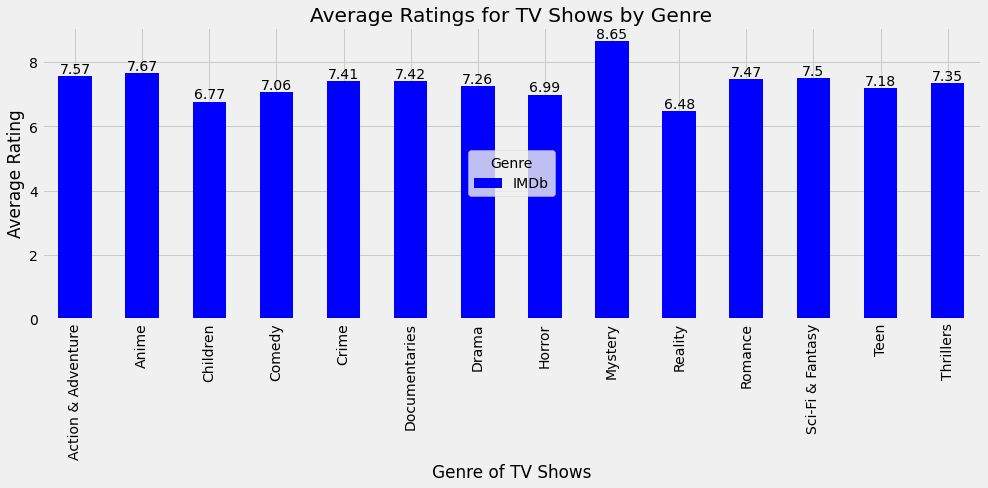

In [72]:
# Create bar graph for Movie ratings by genre
from matplotlib import style
style.use('fivethirtyeight')
tv_shows_imdb.plot.bar(figsize=(15,5), title="Average Ratings for TV Shows by Genre", color = 'b')
plt.legend(loc="center", title='Genre')
plt.ylabel("Average Rating")
plt.xlabel("Genre of TV Shows")
for i in range(len(tv_shows_imdb)):
    plt.text(i, round(tv_shows_imdb[i], 2), round(tv_shows_imdb[i], 2), ha='center', va="bottom")
# Save Figure
plt.savefig("visualizations/tv_show_rating_by_genre.png")
plt.show()

In [73]:
# Generate average values by Genre
ratings_imdb = titles_df.groupby(["Genre"]).mean()["IMDb"]
ratings_imdb

Genre
Action & Adventure    6.144444
Anime                 7.664444
Children              6.468649
Comedy                6.343832
Crime                 7.410385
Documentaries         7.027664
Drama                 6.570829
Horror                5.521622
Musicals              7.375000
Mystery               8.650000
Reality               6.484416
Romance               7.078182
Sci-Fi & Fantasy      5.819048
Teen                  7.183333
Thrillers             5.850000
Name: IMDb, dtype: float64

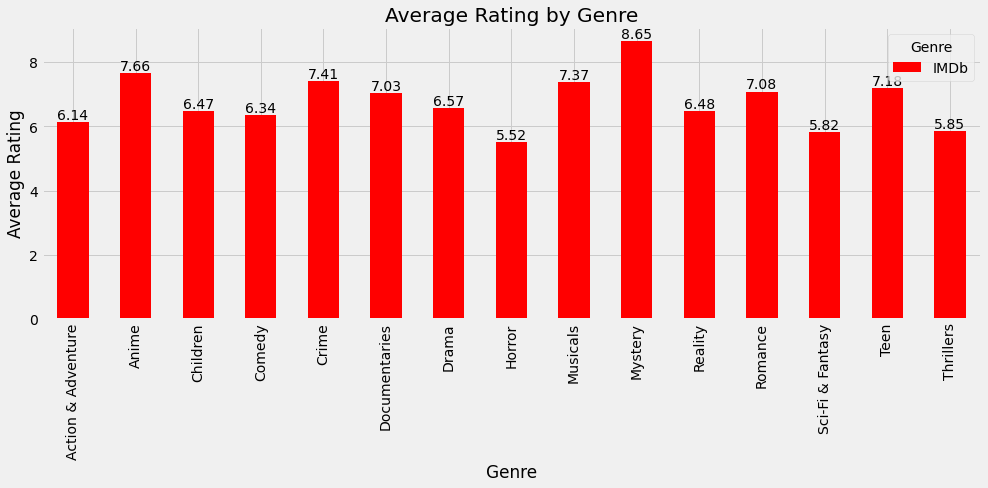

In [74]:
# Create bar graph for average rating per Genre
from matplotlib import style
style.use('fivethirtyeight')
ratings_imdb.plot.bar(figsize=(15,5), title="Average Rating by Genre", color = 'r')
plt.legend(loc="best", title='Genre')
plt.ylabel("Average Rating")
plt.xlabel("Genre")
for i in range(len(ratings_imdb)):
    plt.text(i, round(ratings_imdb[i], 2), round(ratings_imdb[i], 2), ha='center', va="bottom")
# Save Figure
plt.savefig("visualizations/average_rating_by_genre.png")
plt.show()

In [75]:
# Number of values per type
per_type_counts = titles_df["type"].value_counts()
per_type_counts

Movie      2668
TV Show    1223
Name: type, dtype: int64

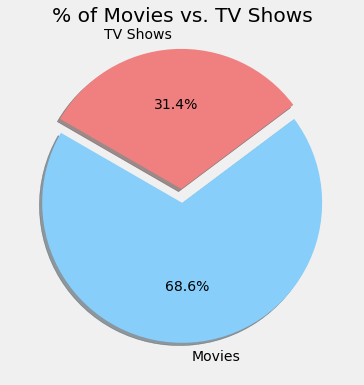

In [76]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(per_type_counts,
    labels=["Movies", "TV Shows"],
    colors=["lightskyblue", "lightcoral"],
    explode=[0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Movies vs. TV Shows")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("visualizations/percentage_movies_shows.png")
# Show Figure
plt.show()

In [77]:
# Show complete dataframe
#pd.set_option("display.max_rows", 9999)

In [78]:
# Final dataframe
titles_df

Title     type  \
0                                                    3%  TV Show   
1                                                  7:19    Movie   
2                                                 23:59    Movie   
3                                                     9    Movie   
4                                                    21    Movie   
5                                                    46  TV Show   
6                                                   706    Movie   
7                                                  1920    Movie   
8                                                  1922    Movie   
9                                                  1983  TV Show   
10                                                 1994  TV Show   
11                                                2,215    Movie   
12                                                 3022    Movie   
13                                               22-Jul    Movie   
14                                               15-Aug    Movie   
15                                             (T)ERROR    Movie   
16                                             #blackAF  TV Show   
17                                     #cats_the_mewvie    Movie   
18                                         #realityhigh    Movie   
19                                            #Rucker50    Movie   
20                                              #Selfie    Movie   
21                                       ¡Ay, mi madre!    Movie   
22                          Çok Filim Hareketler Bunlar    Movie   
23                                       10 jours en or    Movie   
24                                           100 Meters    Movie   
25                                          100% Hotter  TV Show   
26                                      1000 Rupee Note    Movie   
27                                           13 Cameras    Movie   
28                                       13 Reasons Why  TV Show   
29                   13 Reasons Why: Beyond the Reasons  TV Show   
30                                              13 Sins    Movie   
31                                            14 Blades    Movie   
32                                           14 Cameras    Movie   
33                                14 Minutes from Earth    Movie   
34                                          18 Presents    Movie   
35                1898: Our Last Men in the Philippines    Movie   
36                                             2 States    Movie   
37                                           20 Minutes  TV Show   
38                                   2015 Dream Concert    Movie   
39                                   20th Century Women    Movie   
40                                           21 Thunder  TV Show   
41                                     24 Hours to Live    Movie   
42                                             25 Kille    Movie   
43                                             26 Years    Movie   
44                                        3 Generations    Movie   
45                                           3 Heroines    Movie   
46                                             3 Idiots    Movie   
47                                    3 Seconds Divorce    Movie   
48                                  300 Miles to Heaven    Movie   
49                                           37 Seconds    Movie   
50                             3Below: Tales of Arcadia  TV Show   
51                                              44 Cats  TV Show   
52                                  48 Christmas Wishes    Movie   
53                                         5 Flights Up    Movie   
54                                     5 Star Christmas    Movie   
55                                           6 Balloons    Movie   
56                                               6 Days    Movie   
57                                        6 Underground    Movie   
58                                    